# 1. Analyze Synchronized freezing

---
## 1-1. Compute %_overlapped_freezing & Cohen_D

**Tasks:**
1. Read CSV files from subholders, and output "summary.csv"
2. Compute %_freezing and %_overlapped_freezing, and output to "summary1.csv"
3. Compute permutation/Cohen_D and store in DF, and output to "summary2.csv"
4. Compute lag times, and output to "summary3.csv"

**Requirements:**
    
Set path to the root folder, which contains multiple experiment folders. Each experiment folder
contains CSV files, which describe freezing onset and offset for two subjects.

**Output sumary2.csv file format:**

|Foldername_videoname|single_animal|fz_start_sub1|fz_end_sub1|fz_start_sub2|fz_end_sub2|fz_sub1|fz_sub2|fz_overlap|cohen_d|lagt_start_s1_s2|lagt_start_s2_s1|lagt_end_s1_s2|lagt_end_s2_s1|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|str|bool|int array|int array|int array|int array|float|float|float|float|int array|int array|int array|int array|

**It would take 2:30.**



In [1]:
#############################################
# Specify the folder
path = r"W:\videos_synchrony"
#############################################
import synchro_freeze as sf
import traceback
import os

DEBUG = False
#DEBUG = True
df = sf.process_freeze(path,DEBUG)

Step1. Reading CSV files from subfolders.
	Processing directory:  20190408_testing_1,  20190408_testing_2,  20190520_test1,  20190520_test2,  20190611_afternoon,  20190611_morning,  20190801_opioid_test_morning,  20190803_testmorning,  20190809_afternoon,  20190809_morning,  20190814,  20190818,  20190820,  20190827,  20190902,  20190917,  20191012,  20191015,  20191016,  20191024,  20191028,  20191109,  20191224,  20200115,  20200218,  20200318,  20200324,  20200328,  20200331,  20200413,  20200420,  20200427,  20200518,  completed.
	Writing summary.csv.

Step2. Computing %_freezing.
	Writing summary1.csv.

Step3. Computing permutation/Cohen_D and store in DF.
	Processing column:  0/262,  1/262,  2/262,  3/262,  4/262,  5/262,  6/262,  7/262,  8/262,  9/262,  10/262,  11/262,  12/262,  13/262,  14/262,  15/262,  16/262,  17/262,  18/262,  19/262,  20/262,  21/262,  22/262,  23/262,  24/262,  25/262,  26/262,  27/262,  28/262,  29/262,  30/262,  31/262,  32/262,  33/262,  34/262,  35/2

---
## 1-2. Display specific experiment
### Resulting figure will be output as overlap_fig.eps

In [2]:
print("We found the following Foldername_videoname.\n")
for i in range (0, len(df)):
    print("\t", i, df.iloc[i,0])

print("\nSelect the Foldername_videoname ID number and run the next cell")

We found the following Foldername_videoname.

	 0 20190408_testing_1_f10ab
	 1 20190408_testing_1_f6ab
	 2 20190408_testing_1_f8ab
	 3 20190408_testing_1_m10ab
	 4 20190408_testing_1_m6ab
	 5 20190408_testing_1_m8ab
	 6 20190408_testing_2_f11ab
	 7 20190408_testing_2_f7ab
	 8 20190408_testing_2_f9ab
	 9 20190408_testing_2_m7ab
	 10 20190408_testing_2_m9ab
	 11 20190520_test1_f12ab
	 12 20190520_test1_f13ab
	 13 20190520_test1_f17ab
	 14 20190520_test1_m13ab
	 15 20190520_test2_f14ab
	 16 20190520_test2_f15ab
	 17 20190520_test2_f16ab
	 18 20190520_test2_m11ab
	 19 20190520_test2_m12ab
	 20 20190611_afternoon_f19af21b
	 21 20190611_afternoon_f19bf21a
	 22 20190611_afternoon_f23af25b
	 23 20190611_afternoon_f23bf25a
	 24 20190611_afternoon_m14ab
	 25 20190611_afternoon_m17ab
	 26 20190611_afternoon_m18ab
	 27 20190611_morning_f18af20b
	 28 20190611_morning_f18bf20a
	 29 20190611_morning_f22af24b
	 30 20190611_morning_f22bf24a
	 31 20190611_morning_m15ab
	 32 20190611_morning_m16ab
	 33 2

Folder name: 20200324_m93second
Animal1 freeze : 33.750000
Animal2 freeze : 6.041667
Overlap freeze : 1.666667


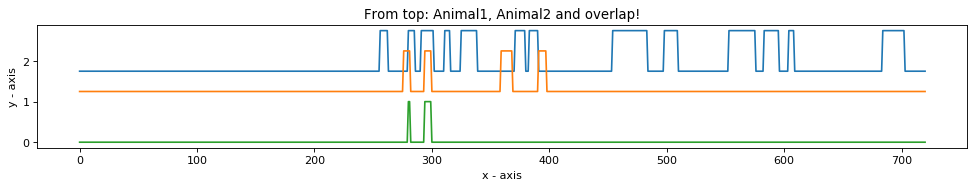

In [4]:
folderID = 150
output = True

(a,b,c,d) = sf.overlap_freezing(df.iloc[folderID,:], path, output)

---
## 1-3. Test the significance of overlapped freezing by permutation
1. Calculate overlapped freezing by permutating relative freezing dynamics between the two animals. <br>
    1K sampling of % overlapped freezing from the permutation will be stored as "test1.csv".
2. One-Sample Wilcoxon Signed Rank Test in R using the "r-codes" notebook.<br>
http://www.sthda.com/english/wiki/one-sample-wilcoxon-signed-rank-test-in-r